#  MOVIES DATABASE EDA 

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


### 2. Data Loading and Description
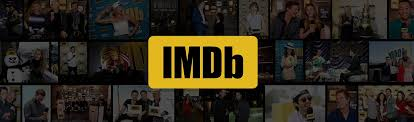

- This dataset contains a large number of public data on films such as the title of the film, the year of release of the film, the genre of the film, the audience, the rating of critics, the duration of the film, the summary of the film, actors, directors and much more. Source is from IMDB website and data extracted with movies year of release between the year 2000 and the year 2017
- Below is the list of information from movies database that will be included in the EDA 

    * Movie title
    * Genre of the film
    * Duration of the film (in minutes)
    * Release year of the film
    * Number of public votes
    * Public rating (score out of 10)
    * Critics rating (score out of 100)
    * Movie Gross (millions of dollars)


#### Importing packages                                          

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import itertools

from subprocess import check_output

#### Importing the Dataset

In [3]:
imdb = pd.read_csv('dataframemovies.csv')                        # Importing IMDB dataset using pd.read_csv

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [4]:
imdb.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(4583, 9)

imdb dataset has __4583 rows__ and __9 columns.__

In [5]:
imdb.columns                                            # This will print the names of all columns.

Index(['Unnamed: 0', 'audienceRating', 'Genre', 'criticRating', 'timeMin',
       'grossMillions', 'Movie', 'Vote', 'Year'],
      dtype='object')

In [6]:
imdb.head()                                            # This will print the first 5 rows of data

,Unnamed: 0,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
0,0,8.5,Action,67,155,187.71,Gladiator,1096457,2000
1,1,8.5,Mystery,80,113,25.54,Memento,942923,2000
2,2,8.3,Comedy,55,104,30.33,Snatch - Tu braques ou tu raques,663244,2000
3,3,8.3,Drama,68,102,3.64,Requiem for a Dream,640047,2000
4,4,7.4,Action,64,104,157.30,X-Men,498388,2000


In [7]:
imdb.tail()                                           # This will print last n rows of data

,Unnamed: 0,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
4578,4578,5.5,Action,35,91,0.00,The Professional,3793,2017
4579,4579,6.5,Drama,75,100,0.03,Super Dark Times,3784,2017
4580,4580,6.4,Action,62,86,0.00,Mayhem,3718,2017
4581,4581,7.1,Biography,57,107,0.00,Borg McEnroe,3580,2017
4582,4582,4.3,Comedy,39,91,20.64,Journal d'un dégonflé: un looong voyage,3566,2017


In [8]:

imdb.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 9 columns):
Unnamed: 0        4583 non-null int64
audienceRating    4583 non-null float64
Genre             4583 non-null object
criticRating      4583 non-null int64
timeMin           4583 non-null int64
grossMillions     4581 non-null float64
Movie             4583 non-null object
Vote              4583 non-null int64
Year              4583 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 322.3+ KB


In [9]:
imdb.describe()

,Unnamed: 0,audienceRating,criticRating,timeMin,grossMillions,Vote,Year
count,4583.000000,4583.000000,4583.000000,4583.000000,4581.000000,4.583000e+03,4583.000000
mean,2291.000000,6.510081,55.227144,107.127646,37.249869,8.450176e+04,2008.365263
std,1323.142472,0.993184,17.947463,18.810458,66.167932,1.334644e+05,5.102369
min,0.000000,1.500000,5.000000,48.000000,0.000000,2.760000e+03,2000.000000
25%,1145.500000,5.900000,42.000000,94.000000,0.500000,1.428100e+04,2004.000000
50%,2291.000000,6.600000,56.000000,104.000000,10.940000,3.541600e+04,2008.000000
75%,3436.500000,7.200000,69.000000,116.000000,45.060000,9.317800e+04,2013.000000
max,4582.000000,9.000000,100.000000,366.000000,936.660000,1.865768e+06,2017.000000


In [11]:
imdb.isnull().sum()

Unnamed: 0        0
audienceRating    0
Genre             0
criticRating      0
timeMin           0
grossMillions     2
Movie             0
Vote              0
Year              0
dtype: int64

###### Based on the above results we can see that grossMillions column has null value for few rows

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(imdb)
profile.to_file(outputfile="imdb_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __imdb_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping missing entries of __grossMillions.__
    - Dropping the column __'unnamed'__ as it is not required.   
    - Modifying datatypes for __'Year'__ ,'__Movie__' and '__Genre__'. 

In [11]:
imdb.dropna(inplace=True)                                # dropping missing entries of grossMillions
imdb.isnull().sum()

Unnamed: 0        0
audienceRating    0
Genre             0
criticRating      0
timeMin           0
grossMillions     0
Movie             0
Vote              0
Year              0
dtype: int64

In [12]:
imdb.columns

Index(['Unnamed: 0', 'audienceRating', 'Genre', 'criticRating', 'timeMin',
       'grossMillions', 'Movie', 'Vote', 'Year'],
      dtype='object')

In [13]:
del imdb['Unnamed: 0']          # removing the Unnamed column from the dataframe
imdb.columns 

Index(['audienceRating', 'Genre', 'criticRating', 'timeMin', 'grossMillions',
       'Movie', 'Vote', 'Year'],
      dtype='object')

In [14]:
# convert in category to count and use these columns
imdb.Movie = imdb.Movie.astype('category')
imdb.Genre = imdb.Genre.astype('category')
imdb.Year = imdb.Year.astype('int64')

In [15]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4581 entries, 0 to 4582
Data columns (total 8 columns):
audienceRating    4581 non-null float64
Genre             4581 non-null category
criticRating      4581 non-null int64
timeMin           4581 non-null int64
grossMillions     4581 non-null float64
Movie             4581 non-null category
Vote              4581 non-null int64
Year              4581 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 460.3 KB


## 3.4 Post Pandas Profiling

In [16]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(imdb)
profile.to_file(outputfile="imdb_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values and unwanted columns. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __imdb_after_preprocessing.html__ and __imdb_before_preprocessing.html__.<br/>
In imdb_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __9__ 


### 4. Questions

### 4.1 What is the movie with highest revenue?

In [108]:
imdb[(imdb['grossMillions'] == (max(imdb.grossMillions)))]

,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
3900,8.1,Action,81,136,936.66,Star Wars: Episode VII - Le réveil de la Force,711233,2015


### 4.2 What is the amount of movies that were produced each year?

Text(0.5, 1.0, 'Movie Count by Year')

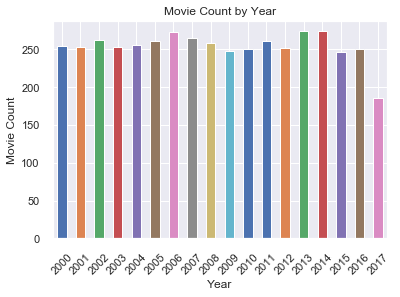

In [135]:
#Determine the amount of movies that were produced each year
movie_yearly_count = imdb['Year'].value_counts().sort_index().plot(kind='bar',alpha=1,rot=45)
# plt.xlim(1999,2016)
# plt.ylim(100,500)
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

### 4.3 Is there any correlation between audience ratings and critics ratings?

In [ ]:
# Let plot a joinplot chart to find out if there is any correlation between Critic rating and Audience Rating

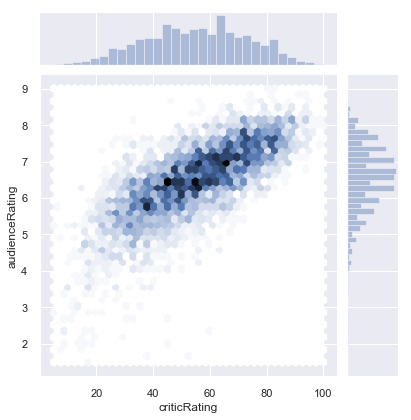

In [112]:
j1 = sns.jointplot(data=imdb, x='criticRating', y='audienceRating', kind='hex')

We see that there is a high concentration of points, following a straight line, which means that in most cases, the audience ratings of the movies are in agreement with those of the critics ratings. We also see that for the public, the distribution is stronger between 5/10 and 8/10 and those of the critics between 30/100 and 80/100, which confirms that in most cases, the coherence between the audience ratings and critics ratings.

### 4.4 Is there any correlation between audience ratings and movie length?

In [ ]:
# let us plot a jointplot between audience rating and movie length parameters

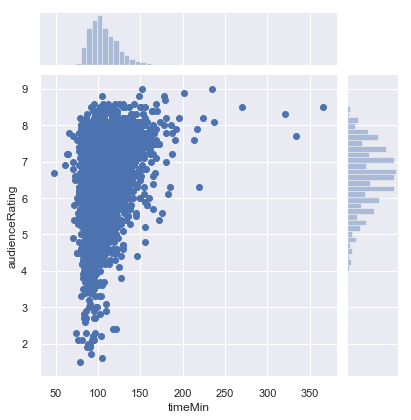

In [115]:
j2 = sns.jointplot(data=imdb, y='audienceRating', x='timeMin')

On this graph, we see that most of the movies last between 60 minutes and 120 minutes and collect the most scores and these scores are between 4/10 and 8/10 with a majority of scores above 6/10.

### 4.5 Is there any correlation between critic ratings and movie length?

In [ ]:
# Let us plot a joinplot to find the correlation between critic rating and movie length parameters

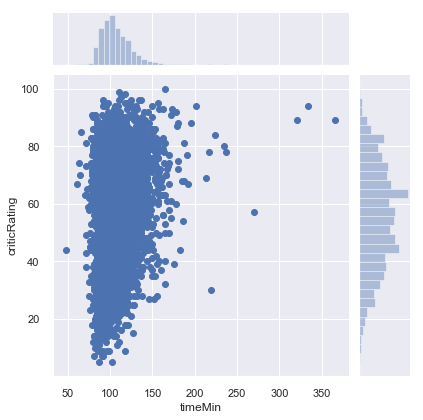

In [116]:
j3 = sns.jointplot(data=imdb, y='criticRating', x='timeMin')

On this graph, we note that for films between 60 minutes and 120 minutes, the ratings of the critics are more concentrated and vary between 10/100 and 98/100

### 4.6 Is there any correlation between revenue and audience rating?

In [ ]:
# let us plot a jointplot to find out if any correlation between revenue and audience rating

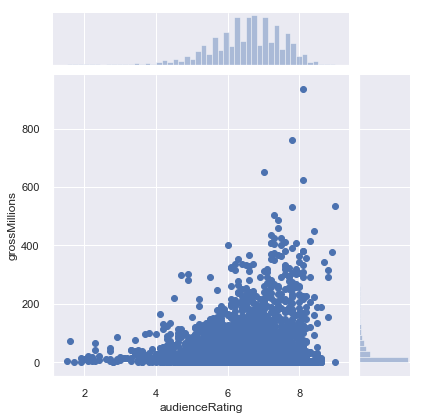

In [117]:
j4 = sns.jointplot(data=imdb, y='grossMillions', x='audienceRating')

On this chart, it is clear that the movies that have been well rated by the public are movies that have generated the most millions of dollars, which is logical because if people have enjoyed a movie, they will talk about them, which will encourage other people to go to the cinema to see it, and thus increase the gross of the movie. Audience (public) ratings are more concentrated between 5/10 and 8/10.

### 4.7 Is there any correlation between revenue and critic rating?

In [ ]:
# let us plot a jointplot to find out if any correlation between revenue and critic rating

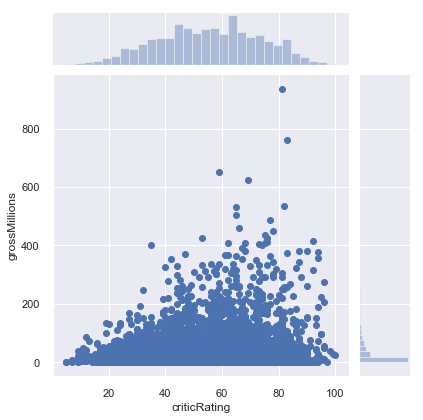

In [119]:
j5 = sns.jointplot(data=imdb, x='criticRating', y='grossMillions')

In this graph, we note that the ratings of the critics are more concentrated between 30/100 and 80/100, which means that the critics are more demanding towards the films than the public. We also note that the films that have high ratings from critics are those who have brought back a lot of money.

### 4.8 Is there any correlation between votes and audience rating?

In [ ]:
# let us plot a jointplot to find out if any correlation between votes and audience rating

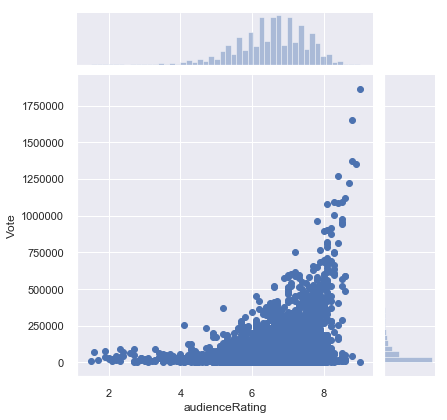

In [136]:
j6 = sns.jointplot(data=imdb, x='audienceRating', y='Vote')

In this chart, the audience rating mostly falls between 5-8 and it has some kind of correlation with votes. 

### 4.9 Is there any correlation between revenue and movie length?

In [ ]:
# let us plot a jointplot to find out if any correlation between revenue and movie length

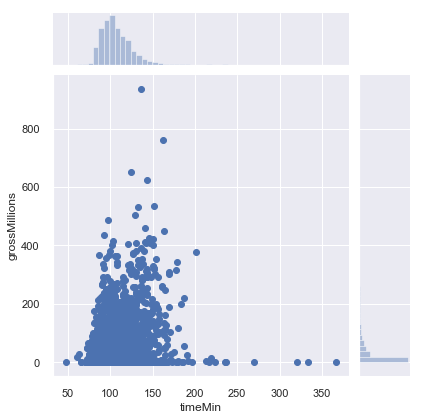

In [138]:
j7 = sns.jointplot(data=imdb, x='timeMin', y='grossMillions')

On this graph, we notice that the movies between 60 minutes and 150 minutes (2h30) are the ones that bring the most. On the other hand, movies with a very long duration, exceeding 3 hours, yield much less, that is to say, under one million dollars.

### 4.10 Distribution by various columns in the imdb dataframe

In [ ]:
# let us plot a distplot 

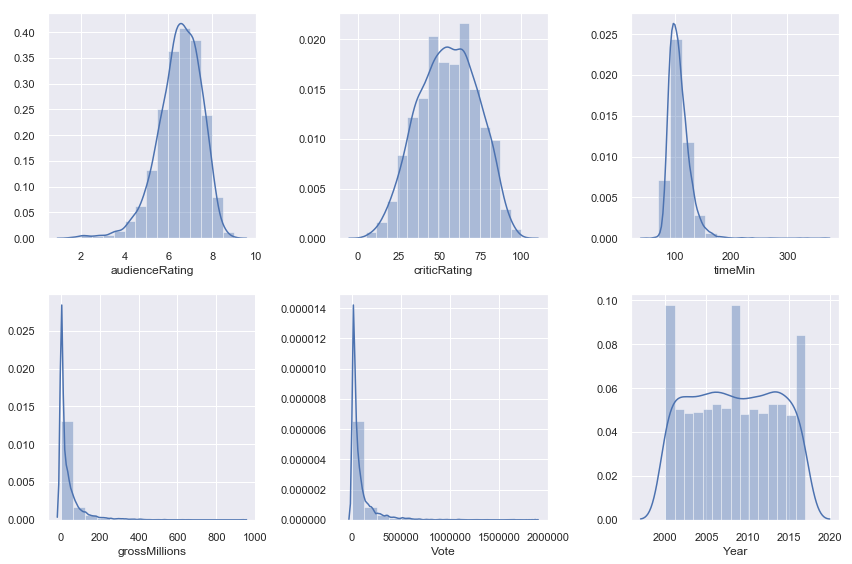

In [139]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)

m1 = sns.distplot(imdb.audienceRating, bins=15, ax=axes[0, 0])
m2 = sns.distplot(imdb.criticRating, bins=15, ax=axes[0, 1])
m3 = sns.distplot(imdb.timeMin, bins=15, ax=axes[0, 2])
m4 = sns.distplot(imdb.grossMillions, bins=15, ax=axes[1, 0])
m5 = sns.distplot(imdb.Vote, bins=15, ax=axes[1, 1])
m6 = sns.distplot(imdb.Year, bins=15, ax=axes[1, 2])

plt.tight_layout()

* Audience Ratings: Most of the audience ratings are between 6/10 and 7/10.
* Critics Ratings: Most critics ratings are between 40/100 and 70/100.
* Duration of the movie: a large number of films have a duration of 100 minutes (1h40).
* Movie Gross: Most movies are worth between 0 and 100 million dollars.
* Number of votes: Most votes are between 0 and 250000 votes.
* Year: Many movies were released in 2000, 2009 and 2017.

### 4.11 Which are the Top 5 Genres based on number of movies? 

In [140]:
unique_genres = imdb['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

In [141]:
#Determine the percent of total entries are attributed to each genre. 

genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = imdb['Genre'].str.contains(genre).fillna(False)
    pct = len(imdb[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

Drama 94.19999999999999
Crime 33.800000000000004
Biography 26.6
War 0.1
Mystery 2.4
Music 0.2
Adventure 23.599999999999998
Horror 23.0
Sci 0.7000000000000001
Comedy 121.9
Fantasy 1.0
Family 0.2
Documentary 14.2
Thriller 0.8
Romance 0.7000000000000001
Action 91.4
Western 0.1
Animation 23.200000000000003


Text(0.5, 1.0, 'Percent of Total Movies Made from Top 5 Genres')

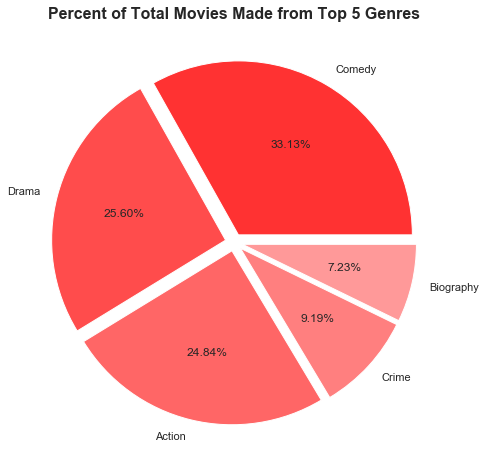

In [87]:
genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

Based on the above Pie chart, the following are the top 5 genres based on number of movies;
    1) Comedy 2)Drama 3) Action 4) Crime and 5) Biography
    

### 4.12 Which are the data analytics based on different genres? 

In [88]:
# subsetting the dataframe
imdb_genre = imdb.loc[(imdb.Genre == 'Action') | (imdb.Genre == 'Drama') | \
                     (imdb.Genre == 'Biography') | \
                      (imdb.Genre == 'Comedy') | (imdb.Genre == 'Crime')]

In [89]:
imdb_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 0 to 4582
Data columns (total 8 columns):
audienceRating    3679 non-null float64
Genre             3679 non-null category
criticRating      3679 non-null int64
timeMin           3679 non-null int64
grossMillions     3679 non-null float64
Movie             3679 non-null category
Vote              3679 non-null int64
Year              3679 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 408.3 KB


In [90]:
imdb_genre.Genre.cat.categories

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
       'Mystery', 'Romance', 'Sci', 'Thriller', 'War', 'Western'],
      dtype='object')

In [91]:
imdb_genre.Genre = imdb_genre.Genre.cat.remove_unused_categories()

In [92]:
imdb_genre.Genre.cat.categories

Index(['Action', 'Biography', 'Comedy', 'Crime', 'Drama'], dtype='object')

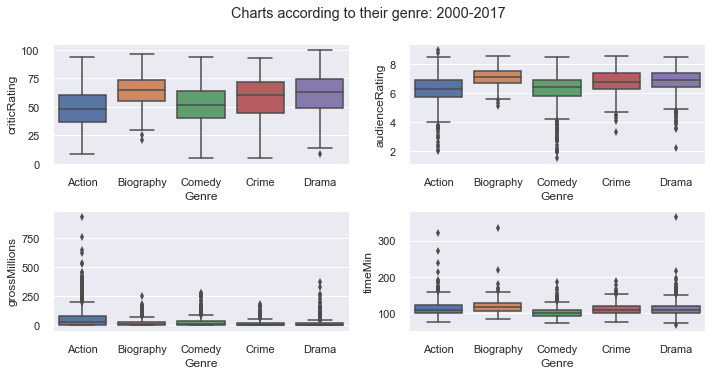

In [93]:
sns.set()
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.boxplot(data=imdb_genre, x='Genre', y='criticRating', ax=axes[0, 0])
sns.boxplot(data=imdb_genre, x='Genre', y='audienceRating', ax=axes[0, 1])
sns.boxplot(data=imdb_genre, x='Genre', y='grossMillions', ax=axes[1, 0])
sns.boxplot(data=imdb_genre, x='Genre', y='timeMin', ax=axes[1, 1])

plt.suptitle('Charts according to their genre: 2000-2017')
plt.show()

### 4.13 Which is the correlation between each column?

Text(0.5, 1.0, 'Correlation between features')

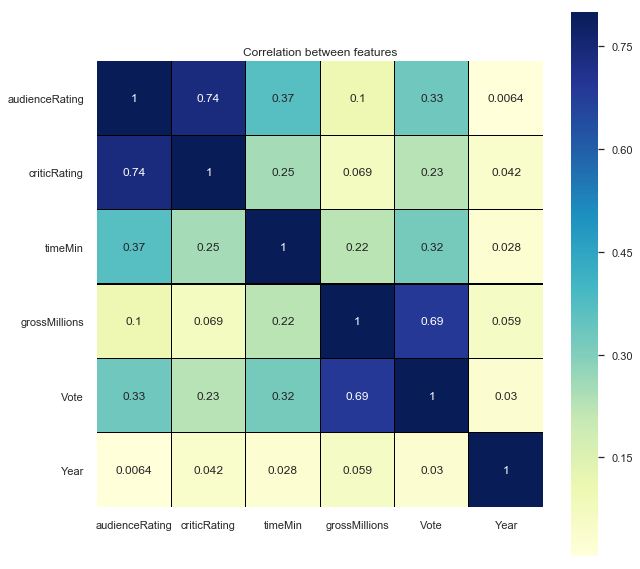

In [113]:
corr = imdb.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

## 5. Conclusion 

- Audience ratings of the movies are quite close to those of the critics ratings
- Critics rate more severely than the public
- Most movies last between 60 minutes and 120 minutes
- Movies that are well rated by public and critics make the most money
- The more the public appreciates a film, the more they vote and give a good rating
- Movies between 60 minutes and 150 minutes (2h30) make the most money
- Movies that exceed 3 hours bring in the least money
- Action Genre movies made the highest revenue in comparison to other genre movies
